# Importando libs



In [42]:
# Comando para padronizar o tamanho de todas as figuras
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [43]:
# Bibliotecas 
import rasterio as rio
from rasterio.plot import show
from spectral import imshow
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from rasterio.warp import reproject, calculate_default_transform
from rasterio.enums import Resampling

# Organizando Bandas

In [3]:
bandas = sorted(glob.glob('C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\*.tiff'))
print(bandas)

['C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B04_(Raw).tiff', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff']


In [4]:
bandas[0]

'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff'

In [44]:
#define destination
dstCrs = {'init' : 'EPSG:31983'}

In [45]:
srcPath = 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\'
lstRst= []
# open source raster
for item in os.listdir(srcPath):
    for file in os.listdir(srcPath+item+"\\"):
        if file.endswith('.tiff'):
            lstRst.append(srcPath+item+"\\"+file)
#lstRst = [file for file in os.listdir(srcPath) if file.endswith('tiff')]

# for i in os.path.dirname(srcPath):
#     print(i)


In [46]:
lstRst

['C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B

In [47]:
srcPath + lstRst[0]

'C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\C:\\Users\\Usuario\\Desktop\\Imagens\\destino\\01_02_2019\\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff'

In [48]:
expRst = rio.open(lstRst[0])
expRst.crs

CRS.from_epsg(4326)

In [49]:
# Criando lista de nome de pastas
dstPath = 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\'
lstDstPath = []
for f in os.listdir(srcPath):
    lstDstPath.append(dstPath+f)
print(lstDstPath)

['C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\01_02_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\01_02_2020', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\01_06_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\03_06_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\03_07_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\04_04_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\04_09_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\05_11_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\07_05_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\08_03_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\09_04_2019', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\10_07_2020', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\10_09_2020', 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python

In [50]:
#criando Pastas
for p in lstDstPath:
    os.makedirs(p)

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\01_02_2019'

In [59]:
def reprojectRaster(srcRst, dstRst, dstCrs, dstPath):
    #open source raster
    srcRst = rio.open(srcRst)

    # calculate transform array and shape of reprojected raster
    transform, width, height = calculate_default_transform(srcRst.crs, dstCrs, srcRst.width, srcRst.height, *srcRst.bounds)

    kwargs = srcRst.meta.copy()
    kwargs.update({
    'crs':dstCrs,
    'transform':transform,
    'width': width,
    'height': height
    })

    #open destination raster
    dstRst = rio.open(dstPath+dstRst, 'w', **kwargs)

    for i in range(1, srcRst.count + 1):
        reproject(
            source=rio.band(srcRst, i),
            destination=rio.band(dstRst, i),
            src_crs=srcRst.crs,
            dst_crs=dstCrs,
            resampling=Resampling.nearest
        )

    dstRst.close()

In [58]:

dstPath

'C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\'

In [60]:
for srcRst in lstRst:
    dstRst = srcRst[-5]+ '_reprojected'+srcRst[-5]
    reprojectRaster(srcRst, dstRst, dstCrs, dstPath)
    print('Reprojection od %s done' %srcRst)

Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B04_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B06_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\Imagens\destino\01_02_2019\2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B07_(Raw).tiff done
Reprojection od C:\Users\Usuario\Desktop\

In [52]:
for srcRst in lstRst:
    dstRst = srcRst[:-5]+'_reprojected'+srcRst[-5:]
    reprojectRaster(srcRst, dstRst, dstCrs, srcPath, dstPath)
    print('Reprojection of %s done'%srcRst)
    

RasterioIOError: 'C:/Users/Usuario/Desktop/Imagens/destino/C:/Users/Usuario/Desktop/Imagens/destino/01_02_2019/2019-02-01-00_00_2019-02-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff' does not exist in the file system, and is not recognized as a supported dataset name.

In [29]:
src0 = rio.open('C:\\Users\\Usuario\\Documents\\GitHub\\PDI_Python\\output\\2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B03_(Raw)_reprojected.tiff')

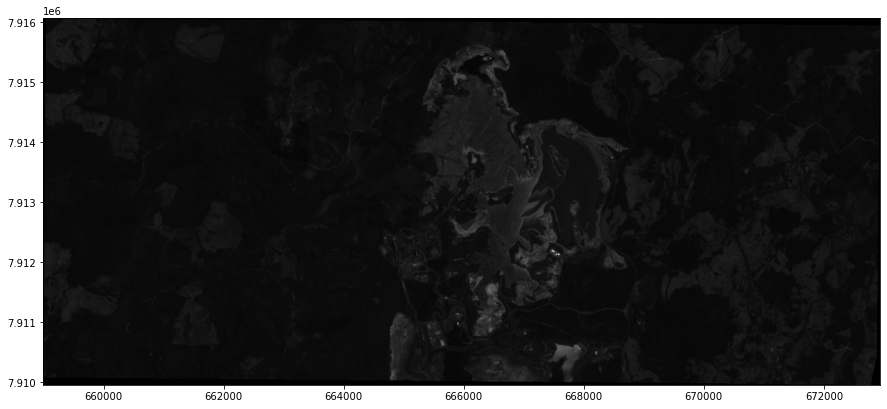

<AxesSubplot:>

In [31]:
# Comando para padronizar o tamanho de todas as figuras
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)
show(src0, cmap="gray")